# Insurance Analysis
---
**Tools:** Python dan MySQL (screenshot MySQL tersedia di notebook ini). Tools yang digunakan bergantung pada seberapa efektif kode atau pertanyaan pada kondisi atau pertanyaan yang relevan.

## Import Dataset

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene

custom_palette = ["#FF7B00", "#FF8800", "#FF9500", "#FFA200", "#FFAA00", "#FFB700"]
sns.set_palette(custom_palette)


In [143]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [145]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [146]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [147]:
print("Jumlah duplikasi = ", df.duplicated().sum())

Jumlah duplikasi =  1


In [148]:
df.drop_duplicates(inplace=True)
print("Jumlah duplikasi = ", df.duplicated().sum())

Jumlah duplikasi =  0


In [149]:
df.rename(columns={'sex': 'gender', 'smoker':'isSmoker'}, inplace=True)
df.head()

,age,gender,bmi,children,isSmoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


MySQL sudah ter-import dengan membuat schema, database, dan tabel yang disebut insurance pada phpMyadmin. Hasilnya ditunjukkan pada gambar berikut:

![Screenshot PHPMyAdmin](SSCsv.png)


## 1. Descriptive Statistic Analysis
---
Analisis ini meninjau persebaran data, rata-rata, dan elemen lainnya yang dapat ditemukan secara deskriptif. Minimal lima pertanyaan dipilih untuk menjawab beberapa masalah yang terkait dengan analisis statistik deskriptif ini.


#### 1.1 Rata-rata umur pengguna

![Average_age](images/average_age.png)

Jadi, rata-rata umur pengguna adalah 39,6688

#### 1.2 Rata-rata bmi pengguna yang merokok

In [150]:
df_smoker = df[df['isSmoker']=="yes"]

# Hitung rata-rata BMI dari pengguna yang merokok
avg_bmi_smoker = df_smoker['bmi'].mean()

# Print hasilnya
print("Rata-rata BMI pengguna yang merokok:", avg_bmi_smoker)

Rata-rata BMI pengguna yang merokok: 30.70844890510949


#### 1.3 Mana tagihan kesehatan yang lebih tinggi untuk orang yang merokok atau orang yang tidak merokok?


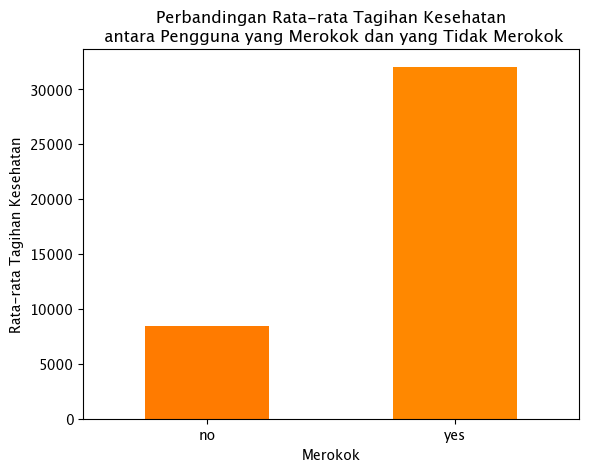

In [151]:
bySmoker_df = df.groupby('isSmoker')['charges'].mean()
bySmoker_df.plot(kind='bar', color=custom_palette)
plt.title('Perbandingan Rata-rata Tagihan Kesehatan\n antara Pengguna yang Merokok dan yang Tidak Merokok')
plt.xlabel('Merokok')
plt.ylabel('Rata-rata Tagihan Kesehatan')
plt.xticks(rotation=0)  # Agar label x-axis tidak terlalu miring
plt.show()

Rata-rata tagihan kesehatan perokok jauh lebih besar daripada non-perokok.

### 1.4 BMI mana yang lebih tinggi, seorang laki-laki atau perempuan?

gender
female    30.38
male      30.94
Name: bmi, dtype: float64


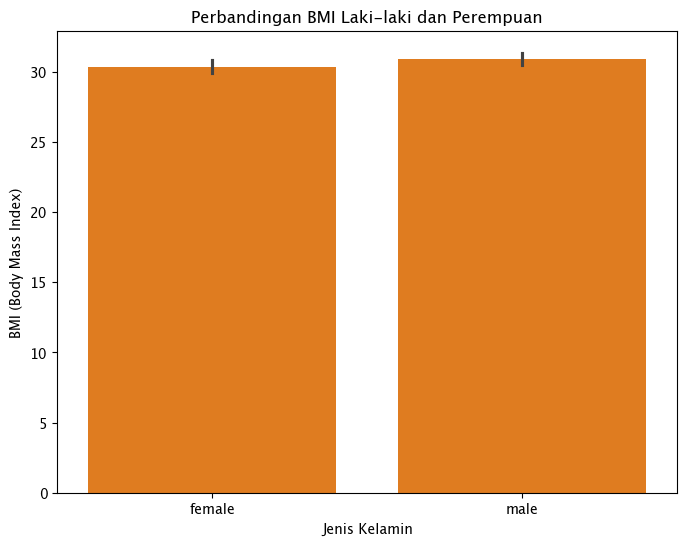

In [152]:
average_bmi_by_gender = np.round(df.groupby('gender')['bmi'].mean(), 2)
print(average_bmi_by_gender)

plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='bmi', data=df)
plt.title('Perbandingan BMI Laki-laki dan Perempuan')
plt.xlabel('Jenis Kelamin')
plt.ylabel('BMI (Body Mass Index)')
plt.show()

BMI laki-kaki lebih tinggi daripada perempuan, namun perbedaannya sangat sedikit sekali.

#### 1.4 BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [153]:
max_bmi = df.groupby('bmi')['isSmoker'].max().sort_index(ascending=False)
print(max_bmi)


bmi
53.130     no
52.580    yes
50.380     no
49.060     no
48.070     no
         ... 
17.385     no
17.290    yes
17.195    yes
16.815     no
15.960     no
Name: isSmoker, Length: 548, dtype: object


Oleh karena itu, orang yang tidak merokok memiliki BMI tertinggi. Namun, jika diminta rata-rata BMI orang yang merokok dan non-perokok, maka:


In [154]:
average_bmi_by_smoker = np.round(df.groupby('isSmoker')['bmi'].mean(), 2)

# Menampilkan hasilnya
print(f"Rata-rata BMI orang yang merokok: {average_bmi_by_smoker['yes']:.2f}")
print(f"Rata-rata BMI orang yang tidak merokok: {average_bmi_by_smoker['no']:.2f}")

Rata-rata BMI orang yang merokok: 30.71
Rata-rata BMI orang yang tidak merokok: 30.65


*Karena jarak antara rata-rata smoker dan non-smoker tidak berbeda jauh, maka tidak divisualisasikan*

Jadi, rata-rata BMI antara smoker dan non-smoker tidak berbeda jauh, yaitu smoker memiliki rata-rata BMI 30,71 sedangkan non-smoker 30,65. BMI perokok lebih tinggi.

#### 1.5 Apakah ada korelasi anatar usia dan tagihan kesehatan?

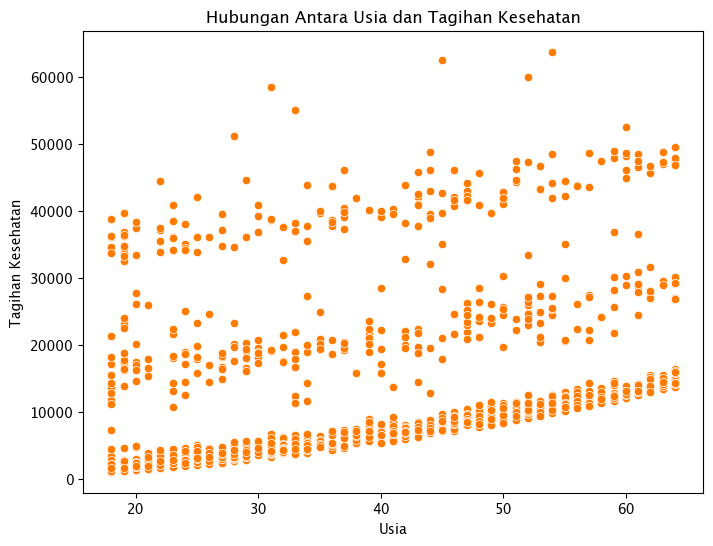

Nilai korelasi antara usia dan tagihan kesehatan: 0.30


In [155]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Hubungan Antara Usia dan Tagihan Kesehatan')
plt.xlabel('Usia')
plt.ylabel('Tagihan Kesehatan')
plt.show()

# Menghitung korelasi
correlation = df['age'].corr(df['charges'])
print(f"Nilai korelasi antara usia dan tagihan kesehatan: {correlation:.2f}")

Nilai korelasi antara usia dan tagihan kesehatan sebesar 0.30 mengindikasikan adanya hubungan positif yang lemah antara kedua variabel tersebut. Artinya, semakin tua usia seseorang, tagihan kesehatannya cenderung naik, dan sebaliknya, semakin muda usia, tagihan kesehatannya cenderung lebih rendah.

Namun, perlu diingat bahwa nilai korelasi sebesar 0.30 termasuk dalam kategori korelasi yang lemah. Oleh karena itu, walaupun ada hubungan positif, perbedaan dalam usia tidak memberikan gambaran lengkap atau signifikan terhadap variasi tagihan kesehatan. Faktor-faktor lain, seperti kondisi kesehatan, jenis kelamin, dan gaya hidup, mungkin juga mempengaruhi tagihan kesehatan secara signifikan.

## 2. Analisis Variabel Kategorik (PMF)
---

#### 2.1 Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [156]:
region_prop = df['region'].value_counts()
print("Jumlah pengguna setiap region: ", region_prop)

Jumlah pengguna setiap region:  region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


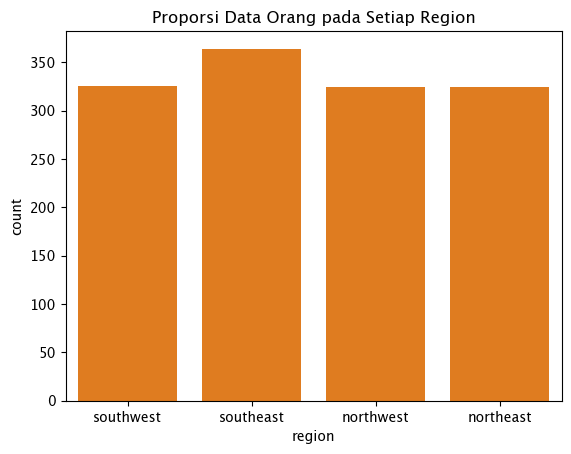

In [157]:
sns.countplot(x=df['region']).set(title='Proporsi Data Orang pada Setiap Region')
plt.show()

Ternyata, proporsi southeast jauh lebih tinggi pada dataset.

#### 2.2 Mana yang lebih tinggi proporsi perokok atau non perokok?

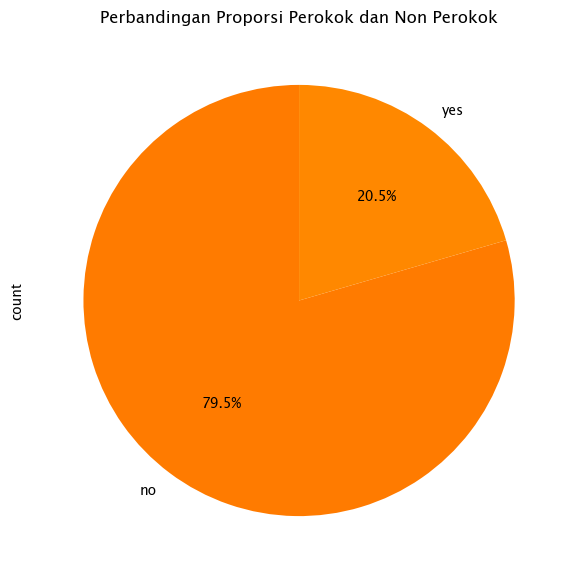

In [158]:
# Melihat perbandingan perokok dan non perokok
fig1 = df['isSmoker'].value_counts().plot(kind='pie', startangle=90, title='Perbandingan Proporsi Perokok dan Non Perokok',
                                      figsize=(7,7), autopct='%1.1f%%')

Proporsi non-perokok jauh lebih besar pada dataset dengan persentase 79,5%, sedangkan proporsi perokok adalah 20,5%

#### 2.3 Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [160]:
smoker_female = df['isSmoker'].where(df['gender']=='female').value_counts()
probabilty_smoker_female = smoker_female[1] / smoker_female.sum()
print("Peluang jenis kelamin perempuan diketahui perokok adalah sebesar {}".format(np.round(probabilty_smoker_female, 2)))

Peluang jenis kelamin perempuan diketahui perokok adalah sebesar 0.17


/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_39938/1261780151.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  probabilty_smoker_female = smoker_female[1] / smoker_female.sum()


#### 2.4 Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [163]:
smoker_male = df['isSmoker'].where(df['gender']=='male').value_counts()
probabilty_smoker_male = smoker_male[1] / smoker_male.sum()
print("Peluang jenis kelamin laki-laki diketahui perokok adalah sebesar {}".format(np.round(probabilty_smoker_male, 2)))

Peluang jenis kelamin laki-laki diketahui perokok adalah sebesar 0.24


/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_39938/1531527956.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  probabilty_smoker_male = smoker_male[1] / smoker_male.sum()


#### 2.5 Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

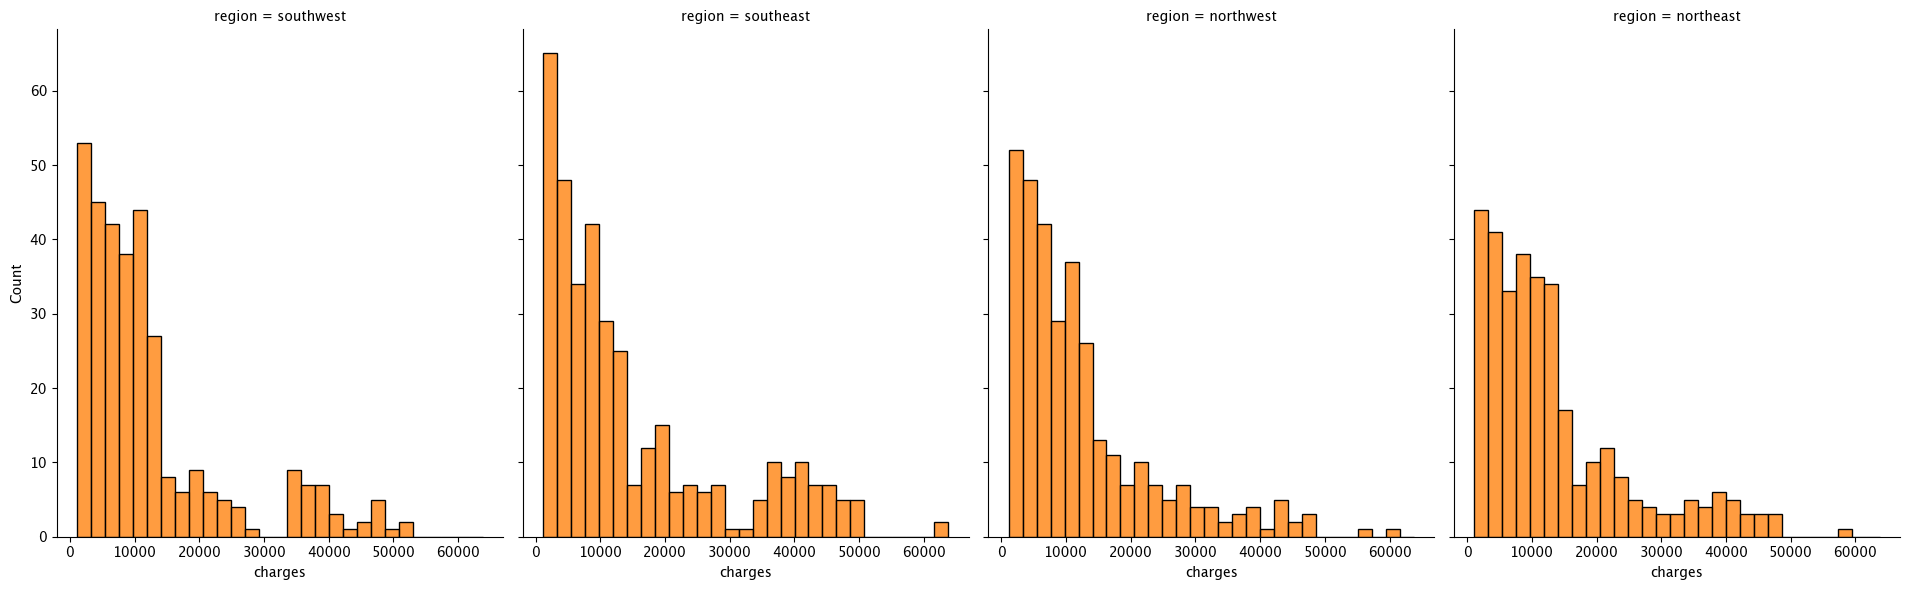

In [165]:
g = sns.displot(df, x='charges', col='region', height=6, aspect=0.8)

### 3. Analisis Variabel Kontinu

1. Mana yang lebih mungkin terjadi:
    - Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
    - Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [166]:
# Sample dengan charge diatas 16.7k

sample = df[df['charges']>16700].value_counts().sum()

# Jumlah orang untuk poin 1a dan 1b
jumlah_up = df.where((df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
jumlah_down = df.where((df['bmi']<25) & (df['charges']>16700)).value_counts().sum()

p_up = jumlah_up/sample
p_down = jumlah_down/sample

# Print
print("Probability orang dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_up, 2)))
print("Probability orang dengan BMI < 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_down, 2)))

Probability orang dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.85
Probability orang dengan BMI < 25 dan tagihan kesehatan > 16.7K adalah 0.15


**Jadi, yang lebih mungkin adalah orang dengan BMI di atas 25 dan tagihan kesehatan di atas 16,7K.**

2. Mana yang lebih mungkin terjadi:
    - Seorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
    - Seorang non-perokok dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [168]:
# Sample masih menggunakan pada point 3.1 sebelumnya karena sama

# Jumlah orang untuk poin 2a dan 2b
jumlah_yes = df.where((df['isSmoker']=='yes') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
jumlah_no = df.where((df['isSmoker']=='no') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()

# Probability
p_yes = jumlah_yes/sample
p_no = jumlah_no/sample

# Print
print("Probability orang perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_yes, 2)))
print("Probability orang non perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah {}".format(np.round(p_no, 2)))

Probability orang perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.64
Probability orang non perokok dengan BMI > 25 dan tagihan kesehatan > 16.7K adalah 0.2


**Jadi, yang lebih mungkin adalah orang perokok dengan BMI di atas 25 dan tagihan kesehatan di atas 16,7K.**

## 4. Analisis Korelasi Variabel
---

<Axes: title={'center': 'Pearson Correlation pada Dataset'}>

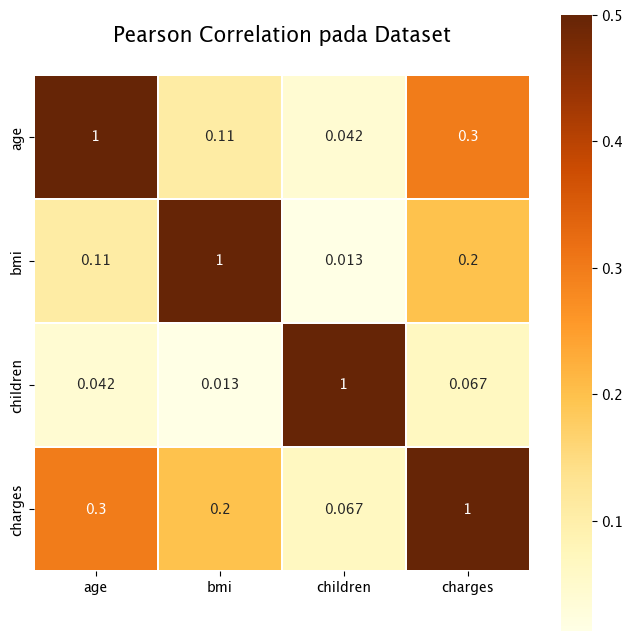

In [169]:
data_corr = df[['age', 'bmi', 'children', 'charges']].corr(method='pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation pada Dataset', y=1.05, size=15)
sns.heatmap(data_corr,linewidths=0.1,vmax=0.5, 
            square=True, cmap='YlOrBr', linecolor='white', annot=True)

## 5.Pengujian Hipotesis

In [170]:
# Function untuk keputusan
alpha = 0.05
def result(p_value):
    if p_value <= alpha: 
        print('Tolak H0') 
    else: 
        print('Gagal tolak H0') 

#### 5.1 Proporsi perokok laki laki lebih besar dari perempuan

In [172]:
cont = pd.crosstab(df['isSmoker'],df['gender'])
value = np.array([cont.iloc[0][0:2].values,cont.iloc[1][0:2].values])

# Memanggil nilai Chi Square
c, p, dof, expected = stats.chi2_contingency(value)
print('P-value:',p)
result(p)

P-value: 0.0062765550120107375
Tolak H0


#### 5.2 Tagihan kesehatan laki-laki lebih besar dari perempuan

In [173]:
male = df[df['gender']=='male']['charges']
female = df[df['gender']=='female']['charges']
stat,p = levene(male,female)
print('P-value:',p)
result(p)

P-value: 0.0016672604848662713
Tolak H0


In [174]:
# Uji T arah kanan
st,p = stats.ttest_ind(male,female)
print('P-value:',(p/2))
result(p/2)

P-value: 0.01691039599755975
Tolak H0
